In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
Ap_all, A1_all, A2_all = (np.array([]) for i in range(3))
Xp_all, X1_all, X2_all = (np.array([]) for i in range(3))
fit_results = sorted(glob.glob('./2022-03-17-Scans/fit_parameters/*.dat'))
for j in range(len(fit_results)):
    fits = Table.read(fit_results[j], format='ascii')
    Ap = fits['Ap']
    Ap = np.array(Ap)
    Ap_all = np.append(Ap_all, Ap)
    
    A1 = fits['A1']
    A1 = np.array(A1)
    A1_all = np.append(A1_all, A1)
    
    A2 = fits['A2']
    A2 = np.array(A2)
    A2_all = np.append(A2_all, A2)
    
    Xp = fits['Xp']
    Xp = np.array(Xp)
    Xp_all = np.append(Xp_all, Xp)
        
    X1 = fits['X1']
    X1 = np.array(X1)
    X1_all = np.append(X1_all, X1)
 
    X2 = fits['X2']
    X2 = np.array(X2)
    X2_all = np.append(X2_all, X2)

In [3]:
board_dict={
'bore': np.arange(0,32),      #board0
'Bot_SE': np.arange(32,64),   #board5
'Bot_SW': np.arange(64,96),   #board6
'Bot_NW': np.arange(96,128),  #board7
'Bot_NE': np.arange(128,160), #board8
}

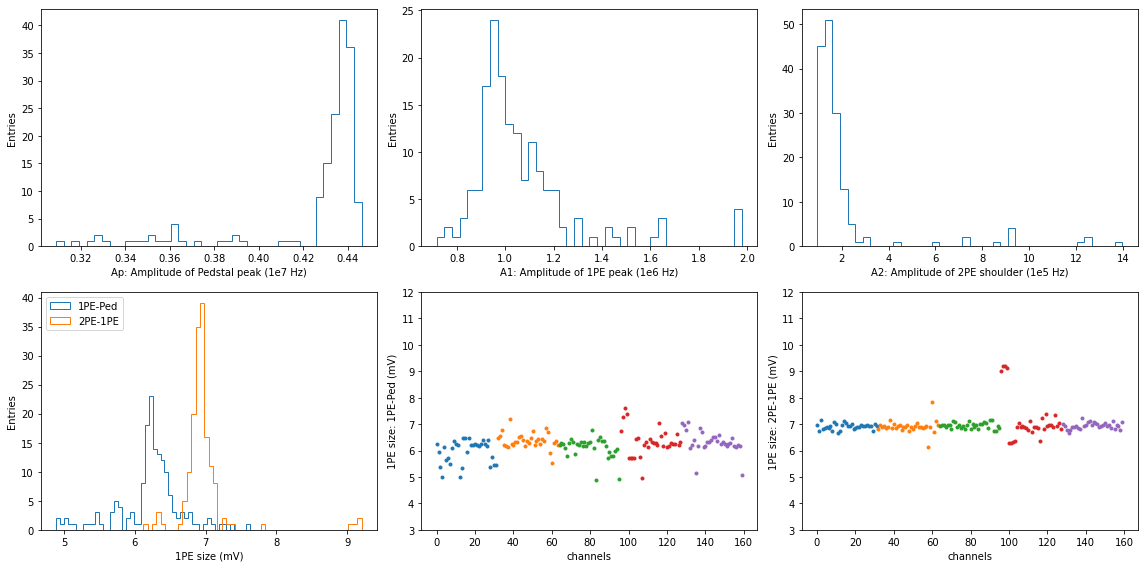

In [19]:
plt.figure(figsize=(16,8))

plt.subplot(231)
plt.hist(Ap_all/1e7, bins=40, histtype='step')
plt.xlabel('Ap: Amplitude of Pedstal peak (1e7 Hz)')
plt.ylabel('Entries')
plt.tight_layout()

plt.subplot(232)
plt.hist(A1_all/1e6, bins=40, histtype='step')
plt.xlabel('A1: Amplitude of 1PE peak (1e6 Hz)')
plt.ylabel('Entries')
plt.tight_layout()

plt.subplot(233)
plt.hist(A2_all/1e5, bins=40, histtype='step')
plt.xlabel('A2: Amplitude of 2PE shoulder (1e5 Hz)')
plt.ylabel('Entries')
plt.tight_layout()

plt.subplot(234)
plt.hist(X1_all-Xp_all,bins=50, histtype='step',label='1PE-Ped')
plt.hist(X2_all-X1_all,bins=50, histtype='step',label='2PE-1PE')
plt.xlabel('1PE size (mV)')
plt.ylabel('Entries')
plt.legend()
plt.tight_layout()

plt.subplot(235)
plt.plot(board_dict['bore'],(X1_all[board_dict['bore']]-Xp_all[board_dict['bore']]),\
             marker='.', linestyle='', label='bore')
plt.plot(board_dict['Bot_SE'],(X1_all[board_dict['Bot_SE']]-Xp_all[board_dict['Bot_SE']]),\
             marker='.', linestyle='', label='Bot_SE')
plt.plot(board_dict['Bot_SW'],(X1_all[board_dict['Bot_SW']]-Xp_all[board_dict['Bot_SW']]),\
             marker='.', linestyle='', label='Bot_SW')
plt.plot(board_dict['Bot_NW'],(X1_all[board_dict['Bot_NW']]-Xp_all[board_dict['Bot_NW']]),\
             marker='.', linestyle='', label='Bot_NW')
plt.plot(board_dict['Bot_NE'],(X1_all[board_dict['Bot_NE']]-Xp_all[board_dict['Bot_NE']]),\
             marker='.', linestyle='', label='Bot_NE')
plt.ylim(3, 12)
plt.xlabel('channels')
plt.ylabel('1PE size: 1PE-Ped (mV)')
plt.tight_layout()

plt.subplot(236)
plt.plot(board_dict['bore'],(X2_all[board_dict['bore']]-X1_all[board_dict['bore']]),\
             marker='.', linestyle='', label='bore')
plt.plot(board_dict['Bot_SE'],(X2_all[board_dict['Bot_SE']]-X1_all[board_dict['Bot_SE']]),\
             marker='.', linestyle='', label='Bot_SE')
plt.plot(board_dict['Bot_SW'],(X2_all[board_dict['Bot_SW']]-X1_all[board_dict['Bot_SW']]),\
             marker='.', linestyle='', label='Bot_SW')
plt.plot(board_dict['Bot_NW'],(X2_all[board_dict['Bot_NW']]-X1_all[board_dict['Bot_NW']]),\
             marker='.', linestyle='', label='Bot_NW')
plt.plot(board_dict['Bot_NE'],(X2_all[board_dict['Bot_NE']]-X1_all[board_dict['Bot_NE']]),\
             marker='.', linestyle='', label='Bot_NE')
plt.ylim(3, 12)
plt.xlabel('channels')
plt.ylabel('1PE size: 2PE-1PE (mV)')
plt.tight_layout()

plt.savefig('./2022-03-17-Scans/summary.pdf')
#plt.close()

In [17]:
from scipy import stats

dev1 = stats.median_abs_deviation(X1_all-Xp_all)
dev2 = stats.median_abs_deviation(X2_all-X1_all)
median1 = np.median(X1_all-Xp_all)
median2 = np.median(X2_all-X1_all)
print('Gain fluctuation = '+str(np.round(dev2/median2*100,2))+'%')

gain = X2_all-X1_all
target_gain = np.median(gain)
gain_corr_fac = (target_gain-gain)/gain

voltage_previous = np.load('./voltage_history/voltages_0302.npy')
voltage_corr = voltage_previous + (gain_corr_fac/0.01)*0.05
voltage_corr = np.round(voltage_corr, 3)
np.save('./voltage_history/voltages_0317.npy', voltage_corr)

Gain fluctuation = 1.07%


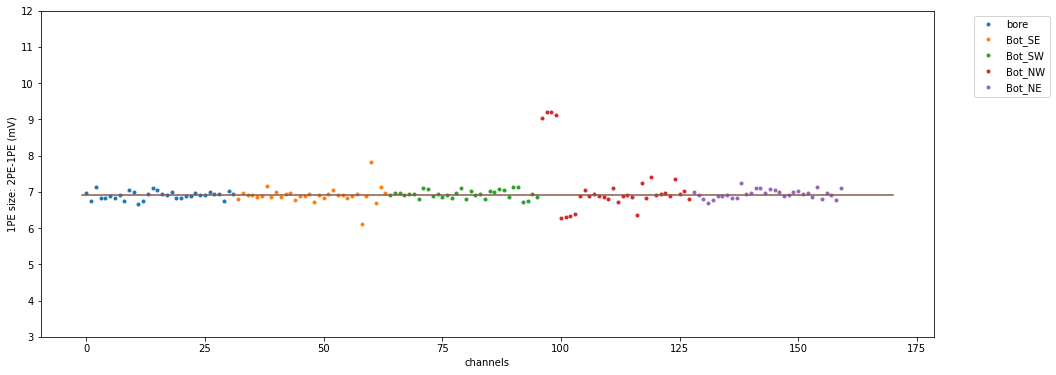

In [18]:
plt.figure(figsize=(16,6))
plt.plot(board_dict['bore'],(X2_all[board_dict['bore']]-X1_all[board_dict['bore']]),\
             marker='.', linestyle='', label='bore')
plt.plot(board_dict['Bot_SE'],(X2_all[board_dict['Bot_SE']]-X1_all[board_dict['Bot_SE']]),\
             marker='.', linestyle='', label='Bot_SE')
plt.plot(board_dict['Bot_SW'],(X2_all[board_dict['Bot_SW']]-X1_all[board_dict['Bot_SW']]),\
             marker='.', linestyle='', label='Bot_SW')
plt.plot(board_dict['Bot_NW'],(X2_all[board_dict['Bot_NW']]-X1_all[board_dict['Bot_NW']]),\
             marker='.', linestyle='', label='Bot_NW')
plt.plot(board_dict['Bot_NE'],(X2_all[board_dict['Bot_NE']]-X1_all[board_dict['Bot_NE']]),\
             marker='.', linestyle='', label='Bot_NE')

plt.plot([-1, 170], [target_gain, target_gain], '-')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylim(3, 12)
plt.xlabel('channels')
plt.ylabel('1PE size: 2PE-1PE (mV)')

plt.savefig('./2022-03-17-Scans/gain.pdf')


In [11]:
for i in range(8):
    print("%.3f, %.3f, %.3f, %.3f" %tuple(voltage_corr[board_dict['bore']][0+i*4:4+i*4] ) )
    #print("%.3f, %.3f, %.3f, %.3f" %tuple(voltage_corr[board_dict['Bot_SE']][0+i*4:4+i*4] ) )
    #print("%.3f, %.3f, %.3f, %.3f" %tuple(voltage_corr[board_dict['Bot_SW']][0+i*4:4+i*4] ) )
    #print("%.3f, %.3f, %.3f, %.3f" %tuple(voltage_corr[board_dict['Bot_NW']][0+i*4:4+i*4] ) )
    #print("%.3f, %.3f, %.3f, %.3f" %tuple(voltage_corr[board_dict['Bot_NE']][0+i*4:4+i*4] ) )


56.863, 56.835, 56.069, 56.031
57.115, 56.431, 56.599, 56.394
57.118, 57.095, 57.079, 57.205
56.526, 56.473, 57.186, 57.161
56.848, 57.340, 56.979, 57.205
57.345, 57.207, 57.130, 57.228
57.146, 56.905, 57.008, 57.157
56.322, 56.802, 56.320, 56.516
